# Mall Customers Data

In [67]:
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist #distortion
import seaborn as sns
import os 
import warnings

plt.style.use('ggplot')
warnings.filterwarnings('ignore')

%matplotlib inline

In [66]:
import pandas as pd
mall_cst = pd.read_csv('../Input Files/Mall Customers/mall_customers.csv')

In [68]:
print(os.listdir("../Input Files/"))

['.ipynb_checkpoints', 'Advertising', 'Digit Recognizer', 'Kannada-MNIST', 'Mall Customers']


---

In [70]:
mall_cst.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID    200 non-null int64
Gender        200 non-null object
Age           200 non-null int64
Income        200 non-null int64
Score         200 non-null int64
dtypes: int64(4), object(1)
memory usage: 19.4+ KB


In [72]:
mall_cst.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
mall_cst.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


---

Checking whether gender have correlation with other metrics.

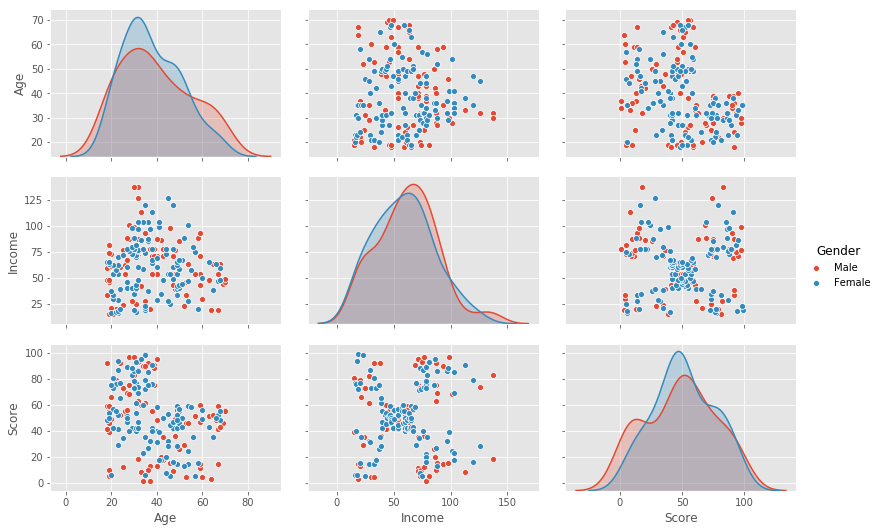

In [74]:
X_cst = mall_cst.drop(['CustomerID','Gender'], axis=1)
sns.pairplot(mall_cst.drop('CustomerID',axis=1), hue='Gender', aspect=1.5)
plt.show()

From the above plot we see that gender has no direct relation to segmenting customers. that's why we can drop it and move on with other features which is why we will only use X parameter from now On.

---

## K-Means

In [76]:
from sklearn.cluster import KMeans

clusters = []
distortion = []
x_axis = list(range(1,11))

for i in range(1,11):
    km = KMeans(n_clusters=i).fit(X_cst)
    clusters.append(km.inertia_)
    
    distortion.append(sum(np.min(cdist(X_cst, km.cluster_centers_, 
                  'euclidean'),axis=1)) / X_cst.shape[0]) 

### K-Means Distortion

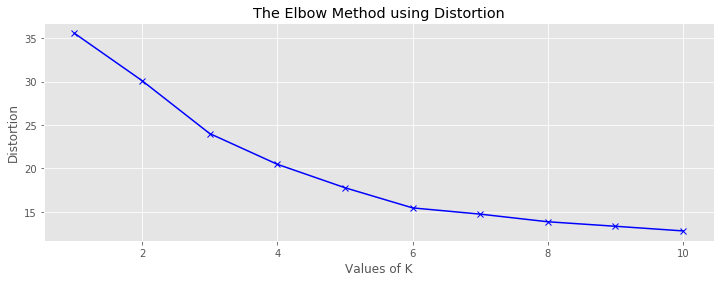

In [77]:
fig, ax = plt.subplots(figsize=(12,4))
plt.plot(x_axis, distortion, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

### K-Means Inertia

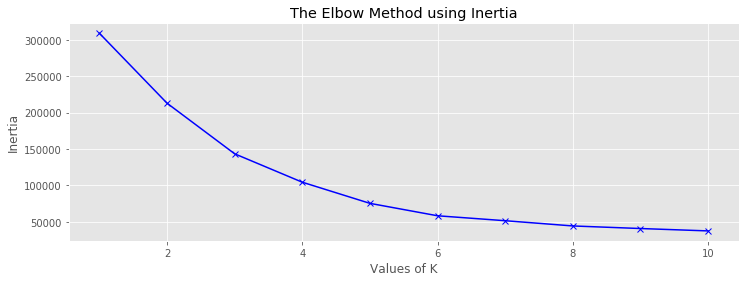

In [84]:
fig, ax = plt.subplots(figsize=(12,4))
plt.plot(x_axis, clusters, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia')
plt.show() 

### K-Means Viz using 3 Clusters

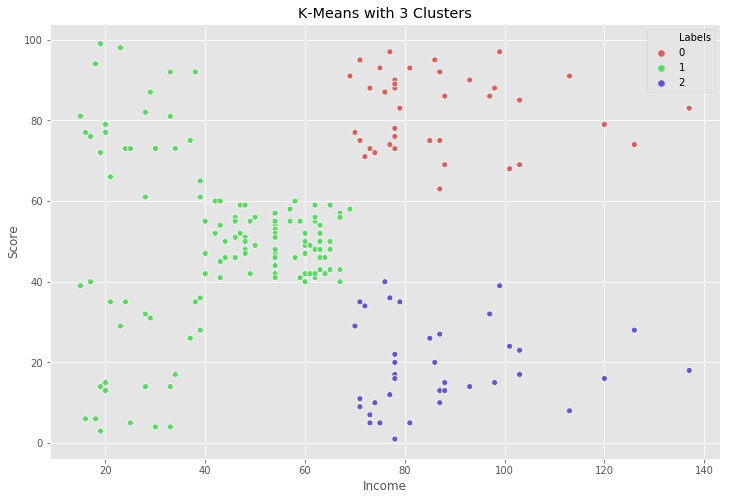

In [78]:
km_cst = KMeans(n_clusters=3).fit(X_cst)

X_cst['Labels'] = km_cst.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(X_cst['Income'], X_cst['Score'], hue=X_cst['Labels'],
               palette=sns.color_palette('hls',3)
               )

plt.title('K-Means with 3 Clusters')
plt.show()

### K-Means Viz using 5 Clusters

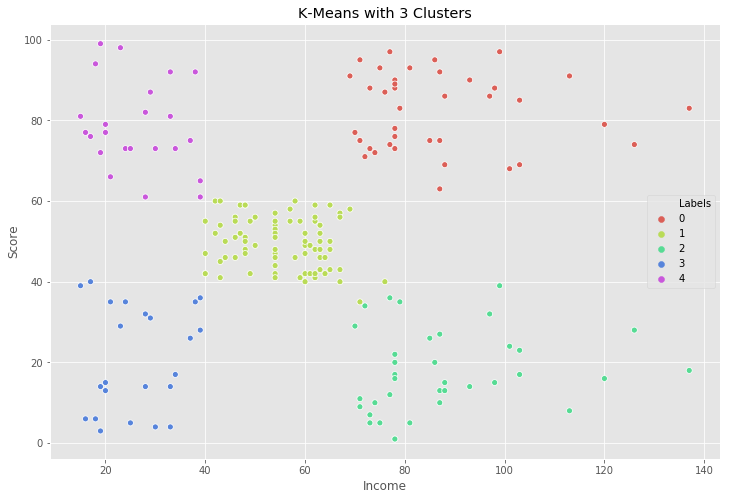

In [81]:
num_clusters = 5
km_cst = KMeans(n_clusters=num_clusters).fit(X_cst)

X_cst['Labels'] = km_cst.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(X_cst['Income'], X_cst['Score'], hue=X_cst['Labels'],
               palette=sns.color_palette('hls',num_clusters)
               )

plt.title('K-Means with 5 Clusters')
plt.show()

By judging from the plots we could say that 5 cluster seems better than the 3 ones. As this is a unsupervised problem we can't really know for sure which one is the best in real life but by looking at the data it's safe to say that 5 would be our choice.

We can analyze our 5 clusters in detail now:

- Label 0 is High Income and High Spending
- Label 1 is Moderate Income and Moderate Spending
- Label 2 is High Oncome with Low Spending
- Label 3 is Low Income and Low Spending
- Label 4 is Low income and High Spending (is the worst people ha)

Also let's see them more clearly with swarmplot:

### SwarmPlot | K-Means

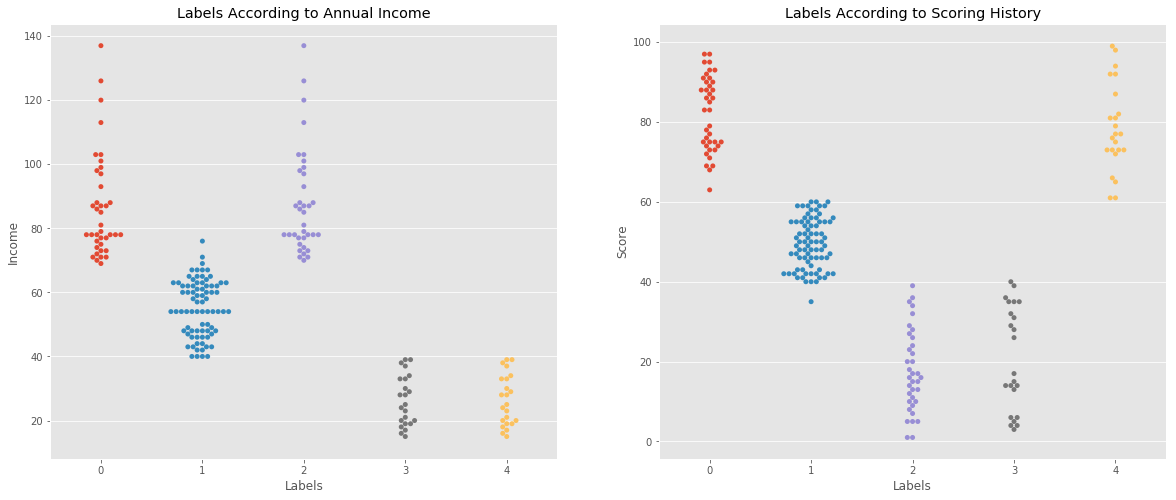

In [85]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Income', data=X_cst, ax=ax)
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Score', data=X_cst, ax=ax)
ax.set_title('Labels According to Scoring History')

plt.show()

## DBScan

---

# Moon Data

## DBSCAN with Scikit-Learn

In [124]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN


%matplotlib inline

In [125]:
X_moon, label = make_moons(n_samples=200, noise=0.1, random_state=19)
print(X[:5,])

[[2.40615694 4.87047502]
 [2.58076718 0.82859918]
 [1.06269622 5.17635143]
 [2.54821895 0.90083925]
 [1.39016098 5.08489507]]


- epsilon: size of the neighborhood around each point
- min_samples = number of points that have to be within that epsilon neighborhood for a point to be considered a core point so min samples is basically our density level of threshold.

### Fit the-Data

In [126]:
model = DBSCAN(eps=0.25, min_samples=12).fit(X_moon)
print(model)

DBSCAN(algorithm='auto', eps=0.25, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=12, n_jobs=None, p=None)


-1: means the noise point.

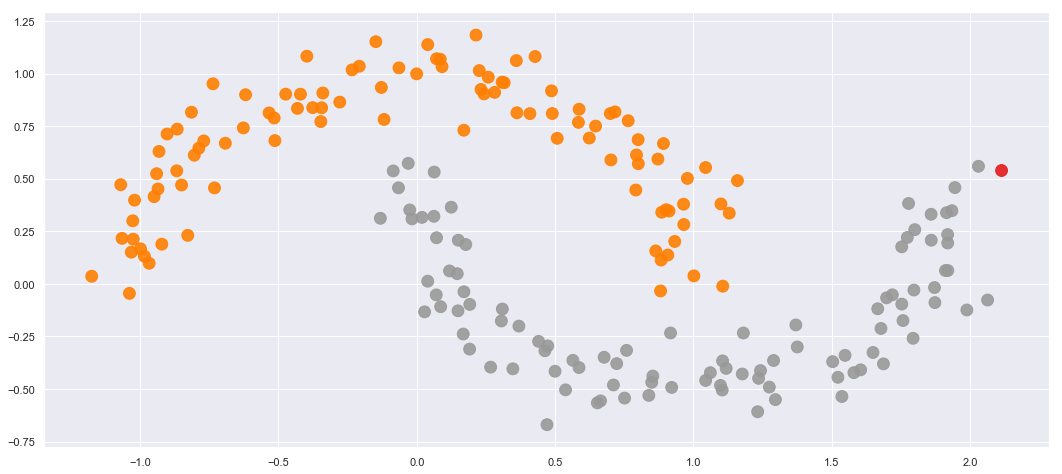

In [128]:
fig, ax = plt.subplots(figsize=(18,8))
sctr = ax.scatter(X_moon[:,0],X_moon[:,1], c=model.labels_, s=140, alpha=0.9, 
                 cmap=plt.cm.Set1)
fig.show()

# let's try to revisit the nearest-neighbor algo to find the most optimal Epsilon.

Please see #3 Header of this book.

what is the N_Neighbors is it really helping us or not?

In [250]:
nn_moon = NearestNeighbors(n_neighbors=3, metric='manhattan', radius=0.)

In [251]:
nn = nn_moon.fit(X_moon)

In [252]:
distances, indices = nn.kneighbors(X_moon)

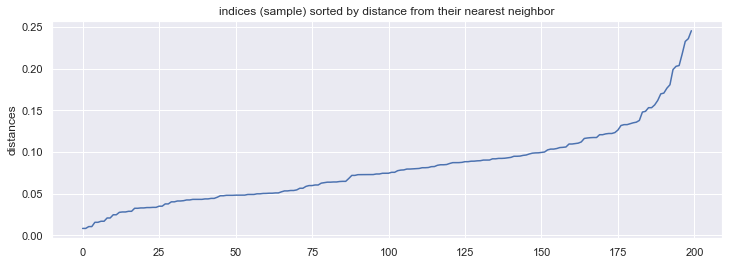

In [253]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
fig, ax = plt.subplots(figsize=(12,4))
plt.title('indices (sample) sorted by distance from their nearest neighbor')
plt.ylabel('distances')
plt.plot(distances)

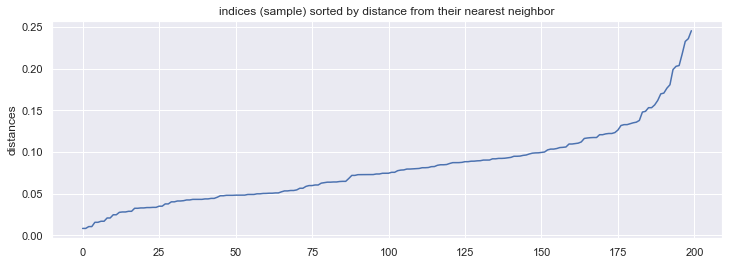

In [245]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
fig, ax = plt.subplots(figsize=(12,4))
plt.title('indices (sample) sorted by distance from their nearest neighbor')
plt.ylabel('distances')
plt.plot(distances)

the steep increase of distance starting from range 0.1 - 0.125

### Using the Epsilon and try again in Moon data?

The cluster that formed from this DBScan really depends on the value of the epsilon as well as the min_sample size of the cluster. eventhough the NearestNeighbor algorithm suggesting to use the value of epsilon between 0.15 -> 0.2 if we keep the min_samples number is too-high.

-1: means the noise point.

In [233]:
model = DBSCAN(eps=0.17, min_samples=2).fit(X_moon)
print(model)

DBSCAN(algorithm='auto', eps=0.17, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=None, p=None)


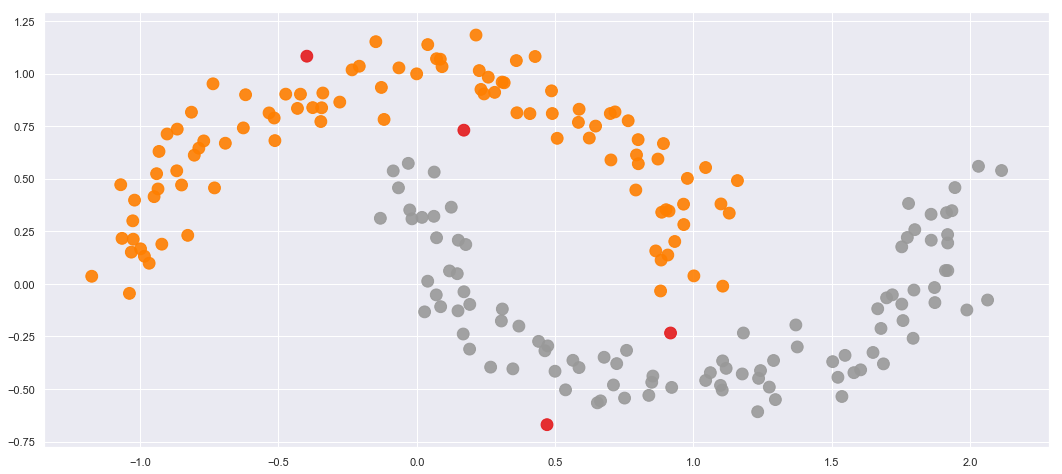

In [234]:
fig, ax = plt.subplots(figsize=(18,8))
sctr = ax.scatter(X_moon[:,0],X_moon[:,1], c=model.labels_, s=140, alpha=0.9, 
                 cmap=plt.cm.Set1)
fig.show()

---

## KMeans on Moon Data

In [50]:
from sklearn.cluster import KMeans

clusters = []
distortion = []
x_axis = list(range(1,11))

for i in range(1,11):
    km = KMeans(n_clusters=i).fit(X_moon)
    clusters.append(km.inertia_)
    
    distortion.append(sum(np.min(cdist(X_moon, km.cluster_centers_, 
                  'euclidean'),axis=1)) / X_moon.shape[0]) 

### Distortion

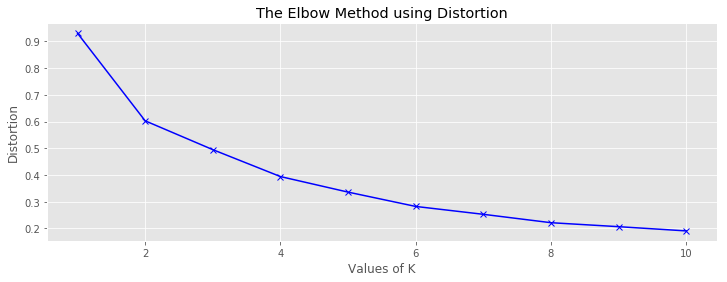

In [51]:
fig, ax = plt.subplots(figsize=(12,4))
plt.plot(x_axis, distortion, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

### Inertia

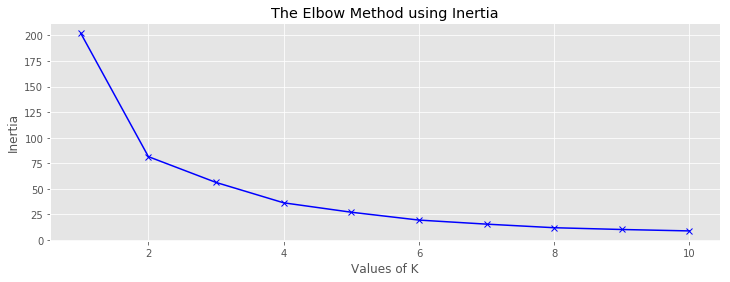

In [52]:
fig, ax = plt.subplots(figsize=(12,4))
plt.plot(x_axis, clusters, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

### Visual Plots

In [62]:
df_moon = pd.DataFrame(X_moon).rename(columns={0:'x_axis',1:'y_axis'})

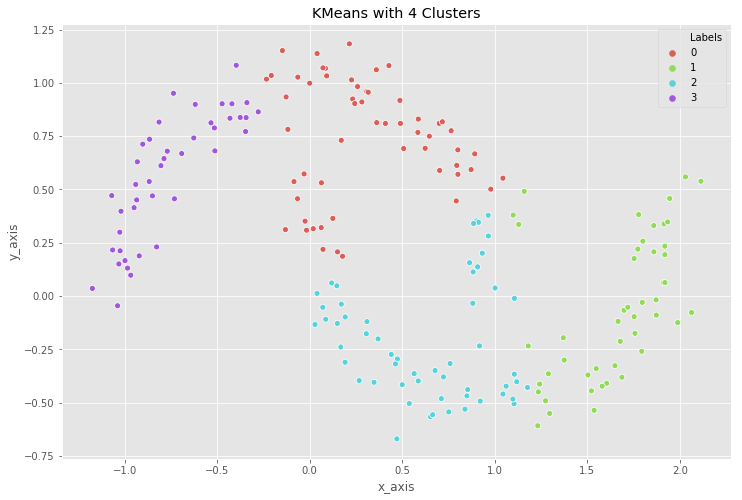

In [65]:
# 3 cluster
kmm_4 = KMeans(n_clusters=4).fit(X_moon)

df_moon['Labels'] = kmm_4.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(df_moon['x_axis'], df_moon['y_axis'], hue=df_moon['Labels'], 
                palette=sns.color_palette('hls', 4))
plt.title('KMeans with 4 Clusters')
plt.show()

# DB-Scan finding value of Epsilon.

- Paper finding optimal value DBScan's Epsilon: https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf
- Blog finding optimal value from R's Blogspot: http://www.sthda.com/english/wiki/wiki.php?id_contents=7940

In [86]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In layman’s terms, we find a suitable value for epsilon by calculating the distance to the nearest n points for each point, sorting and plotting the results. Then we look to see where the change is most pronounced (think of the angle between your arm and forearm) and select that as epsilon.

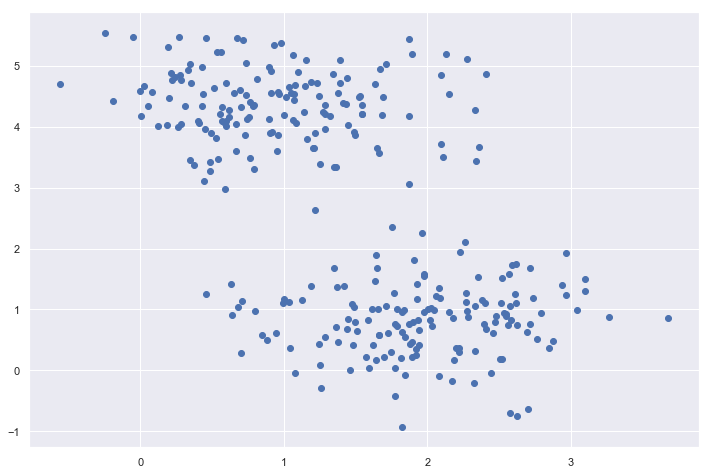

In [114]:
X, y = make_blobs(n_samples=300, centers=2, cluster_std=0.60, random_state=0)
plt.figure(figsize=(12, 8))
plt.scatter(X[:,0], X[:,1])

In [121]:
neigh = NearestNeighbors(n_neighbors=2, metric='manhattan')
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

In [122]:
print(nbrs)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='manhattan',
         metric_params=None, n_jobs=None, n_neighbors=2, p=2, radius=1.0)


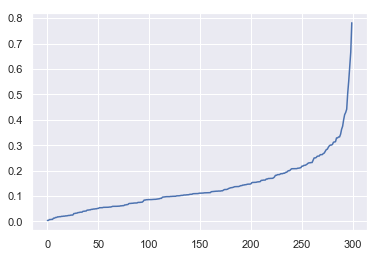

In [123]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier